# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [18]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
%matplotlib inline

   index    date  season  yr  mnth  hr  holiday  weekday  workingday  \
0      1  1/1/11  spring   0     1   0        0        6           0   
1      2  1/1/11  spring   0     1   1        0        6           0   
2      3  1/1/11  spring   0     1   2        0        6           0   
3      4  1/1/11  spring   0     1   3        0        6           0   
4      5  1/1/11  spring   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  
0           1  0.24  0.2879  0.81        0.0   16  
1           1  0.22  0.2727  0.80        0.0   40  
2           1  0.22  0.2727  0.80        0.0   32  
3           1  0.24  0.2879  0.75        0.0   13  
4           1  0.24  0.2879  0.75        0.0    1  
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64
Nu

C:\Users\akkxm\AppData\Local\Temp\ipykernel_13940\546089267.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True)


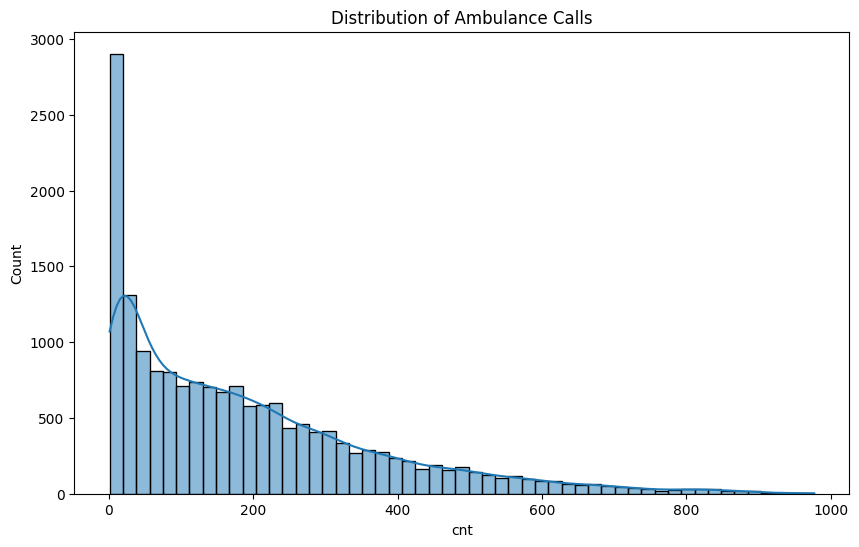

In [19]:
df = pd.read_csv('motorbike_ambulance_calls.csv')

print(df.head())

print(df.isnull().sum())

print(f"Number of duplicate rows: {df.duplicated().sum()}")

df = df.drop_duplicates()

print(df.dtypes)

df['date'] = pd.to_datetime(df['date'], dayfirst=True)

print(df.describe())

plt.figure(figsize=(10,6))
sns.histplot(df['cnt'], kde=True)
plt.title('Distribution of Ambulance Calls')
plt.show()

In [20]:
le_season = LabelEncoder()
le_weathersit = LabelEncoder()
le_weekday = LabelEncoder()
le_holiday = LabelEncoder()

df['season'] = le_season.fit_transform(df['season'])
df['weathersit'] = le_weathersit.fit_transform(df['weathersit'])
df['weekday'] = le_weekday.fit_transform(df['weekday'])
df['holiday'] = le_holiday.fit_transform(df['holiday'])

print(df.head())

features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
target = 'cnt'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


   index       date  season  yr  mnth  hr  holiday  weekday  workingday  \
0      1 2011-01-01       1   0     1   0        0        6           0   
1      2 2011-01-01       1   0     1   1        0        6           0   
2      3 2011-01-01       1   0     1   2        0        6           0   
3      4 2011-01-01       1   0     1   3        0        6           0   
4      5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  
0           0  0.24  0.2879  0.81        0.0   16  
1           0  0.22  0.2727  0.80        0.0   40  
2           0  0.22  0.2727  0.80        0.0   32  
3           0  0.24  0.2879  0.75        0.0   13  
4           0  0.24  0.2879  0.75        0.0    1  
Mean Squared Error: 1774.8004029820297
R-squared: 0.9439514496077718


anomaly
 1    16510
-1      869
Name: count, dtype: int64


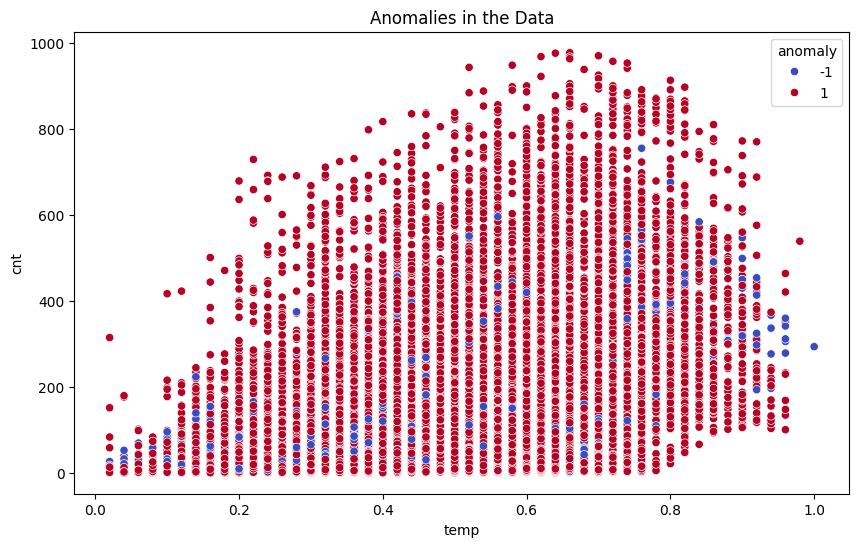

In [21]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(X)

print(df['anomaly'].value_counts())

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['temp'], y=df['cnt'], hue=df['anomaly'], palette='coolwarm', marker='o')
plt.title('Anomalies in the Data')
plt.show()

Огляд даних (Основні ознаки в наборі даних:): 
Індекс, Дата, Сезон (категоризація по сезонах),
Рік (yr), Місяць (mnth), Година (hr) (часові ознаки),
Свято, День тижня, Робочий день (індикатор святкових і вихідних днів),
Погодна ситуація (weathersit), Температура (temp), Відчутна температура (atemp), Вологість (hum), Швидкість вітру (windspeed) та, зрештою,
Кількість викликів швидкої допомоги (cnt), що є цільовою змінною для прогнозування.

Очищення даних:
У наборі даних не виявлено пропущених значень. У наборі даних немає дублікатних рядків, що важливо для збереження цілісності аналізу.

Загальні спостереження на основі статистик:
Набір даних складається з 17379 щогодинних записів, з великою варіативністю у кількості викликів швидкої допомоги (від 1 до 977 викликів). Це видно за високим стандартним відхиленням стовпця cnt. Ознаки температури (temp, atemp) нормалізовані, і обидва діапазони варіюються від 0 до 1. Переважна більшість даних відноситься до робочих днів (68%), тоді як свята трапляються рідше (приблизно 3%).

Random Forest Regressor: 
- є надійною моделлю, яка може обробляти як категоріальні, так і безперервні змінні, а також стійка до перенавчання.

Середня квадратична похибка. Модель досягла значення MSE 1774.80, що вказує на прийнятний рівень помилки в прогнозах.
Коефіцієнт детермінації. Модель показала R-квадрат 0.944, що свідчить про те, що модель пояснює близько 94.4% варіацій у кількості викликів швидкої допомоги.

Виявлення аномалій

Для виявлення аномалій застосовано Isolation Forest, що ефективно працює з виявленням викидів у високовимірних наборах даних.

Аномальні дані:
Класифікація. Модель виявила більшість записів (16510 з 17379) як нормальні (1), а меншу частину (869 записів) класифікувала як аномальні (-1).
Інтерпретація: Аномальні точки, ймовірно, відповідають на несподівані сплески викликів швидкої допомоги, які можуть бути пов'язані зі спеціальними подіями, аваріями або екстремальними погодними умовами.

Можливі причини аномалій:

Великі публічні заходи, аварії чи зібрання можуть призводити до різкого збільшення викликів. Ще може бути такий фактор як екстремальні погодні умови.

Основні висновки:
- Погодні умови та час доби є ключовими факторами для прогнозування кількості викликів швидкої допомоги. 
- Модель Random Forest показала високу точність у прогнозуванні кількості викликів на основі екологічних та сезонних факторів.
- Аномалії, хоча й рідкісні, вказують на спеціальні події або екстремальні обставини, які потребують подальшого дослідження.
